# Prediction Using Unsupervised ML

Dataset : Iris
Objective : To predict the optimal number of clusters and represent it visually

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset

In [7]:
dataset = pd.read_csv('Iris.csv')

In [8]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
X = dataset.iloc[:,1:5].values #Features Matrix

Now let's explore the dataset

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   labels         150 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 7.7+ KB


In [47]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,0.840000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.803349
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,1.750000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


C:\Users\Shanmukh\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Shanmukh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


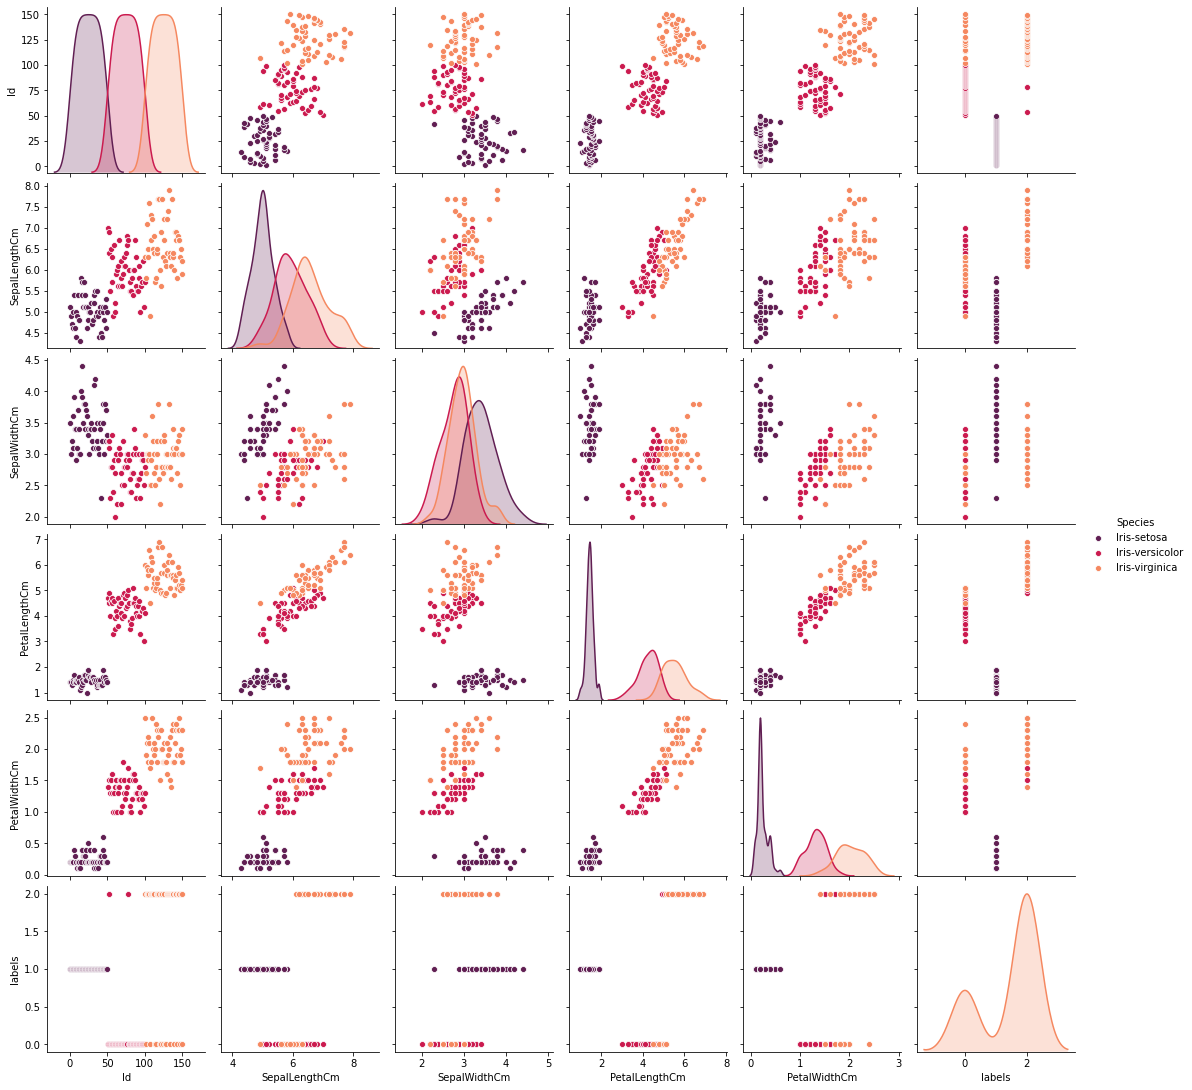

In [48]:
sns.pairplot(data=dataset, hue='Species', palette='rocket')

### Dealing with empty and null values

In [49]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X= imputer.transform(X)

## Using Elbow Method to find optimal number of clusters

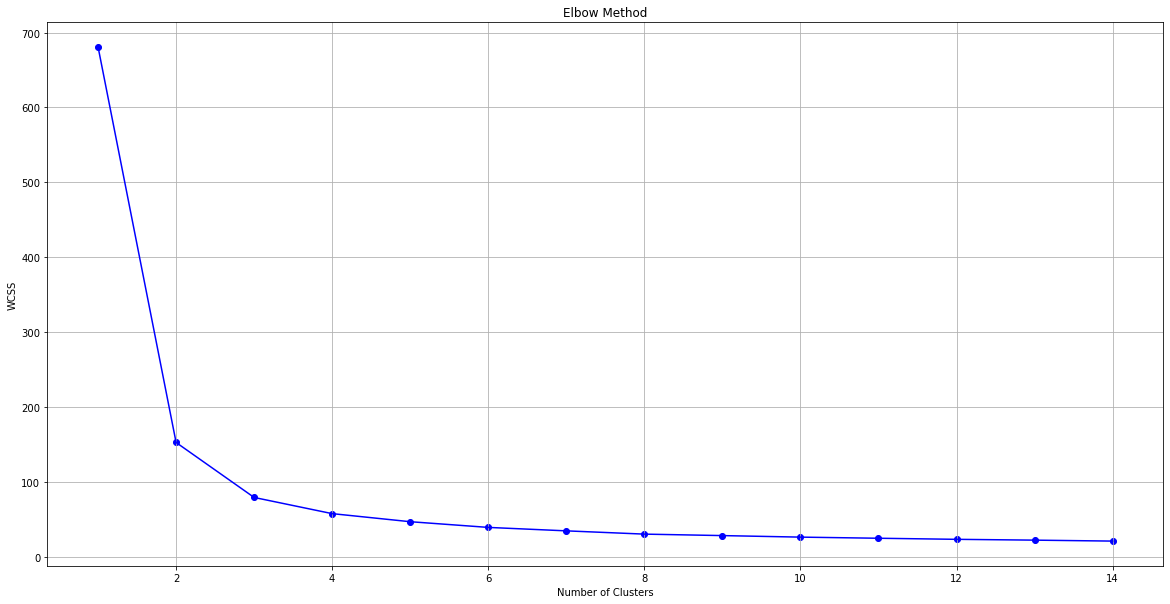

In [50]:
from sklearn.cluster import KMeans
wcss = []   #List to store WCSS values
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,10))
plt.plot(range(1, 15), wcss, color='blue')
plt.grid(True)
plt.scatter(range(1, 15), wcss, color='blue')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Here, it seems that 3 clusters are optimal.

## Training the K-Means model

In [51]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
dataset['labels'] = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Visualizing the clusters

### 1.Petal length v/s Petal width

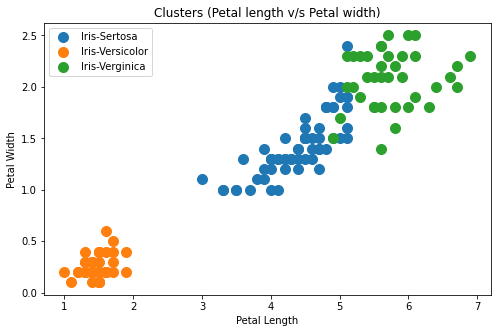

In [71]:
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans==0, 2], X[y_kmeans==0, 3],s=100, label='Iris-Sertosa')
plt.scatter(X[y_kmeans==1, 2], X[y_kmeans==1, 3],s=100, label='Iris-Versicolor')
plt.scatter(X[y_kmeans==2, 2], X[y_kmeans==2, 3],s=100, label='Iris-Verginica')

plt.title("Clusters (Petal length v/s Petal width)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

### 2.Petal width v/s Petal length

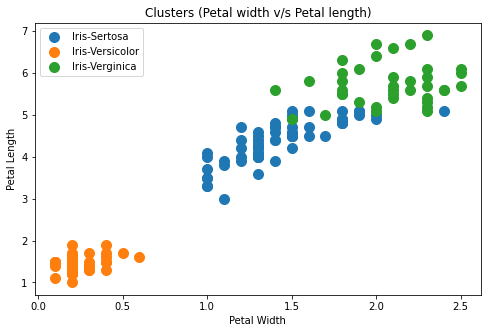

In [73]:
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans==0, 3], X[y_kmeans==0, 2],s=100, label='Iris-Sertosa')
plt.scatter(X[y_kmeans==1, 3], X[y_kmeans==1, 2],s=100, label='Iris-Versicolor')
plt.scatter(X[y_kmeans==2, 3], X[y_kmeans==2, 2],s=100, label='Iris-Verginica')

plt.title("Clusters (Petal width v/s Petal length)")
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

### 3.Sepal length v/s Sepal width

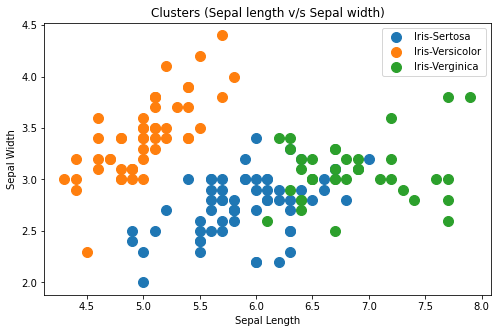

In [74]:
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1],s=100, label='Iris-Sertosa')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1],s=100, label='Iris-Versicolor')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1],s=100, label='Iris-Verginica')

plt.title("Clusters (Sepal length v/s Sepal width)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

### 4.Sepal width v/s Sepal length

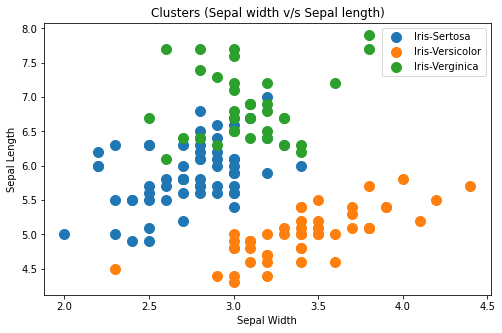

In [75]:
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans==0, 1], X[y_kmeans==0, 0],s=100, label='Iris-Sertosa')
plt.scatter(X[y_kmeans==1, 1], X[y_kmeans==1, 0],s=100, label='Iris-Versicolor')
plt.scatter(X[y_kmeans==2, 1], X[y_kmeans==2, 0],s=100, label='Iris-Verginica')

plt.title("Clusters (Sepal width v/s Sepal length)")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.legend()
plt.show()